# Project : Logistic Regression

## Step 1: Import Libraries and Load Data

In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, precision_score, recall_score, f1_score, roc_auc_score, roc_curve

from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer


## Step 2: Load and Explore the Dataset

In [2]:
# Load the dataset
data = pd.read_excel(r"C:\Users\User\Downloads\Covid Dataset.xlsx")
data.head()



,Breathing Problem,Fever,Dry Cough,Sore throat,Running Nose,Asthma,Chronic Lung Disease,Headache,Heart Disease,Diabetes,...,Fatigue,Gastrointestinal,Abroad travel,Contact with COVID Patient,Attended Large Gathering,Visited Public Exposed Places,Family working in Public Exposed Places,Wearing Masks,Sanitization from Market,COVID-19
0,Yes,Yes,Yes,Yes,Yes,No,No,No,No,Yes,...,Yes,Yes,No,Yes,No,Yes,Yes,No,No,Yes
1,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,No,No,...,Yes,No,No,No,Yes,Yes,No,No,No,Yes
2,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,No,Yes,...,Yes,Yes,Yes,No,No,No,No,No,No,Yes
3,Yes,Yes,Yes,No,No,Yes,No,No,Yes,Yes,...,No,No,Yes,No,Yes,Yes,No,No,No,Yes
4,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,Yes,...,No,Yes,No,Yes,No,Yes,No,No,No,Yes


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5434 entries, 0 to 5433
Data columns (total 21 columns):
 #   Column                                   Non-Null Count  Dtype 
---  ------                                   --------------  ----- 
 0   Breathing Problem                        5434 non-null   object
 1   Fever                                    5434 non-null   object
 2   Dry Cough                                5434 non-null   object
 3   Sore throat                              5434 non-null   object
 4   Running Nose                             5434 non-null   object
 5   Asthma                                   5434 non-null   object
 6   Chronic Lung Disease                     5434 non-null   object
 7   Headache                                 5434 non-null   object
 8   Heart Disease                            5434 non-null   object
 9   Diabetes                                 5434 non-null   object
 10  Hyper Tension                            5434 non-null   obj

In [4]:
data.describe()

,Breathing Problem,Fever,Dry Cough,Sore throat,Running Nose,Asthma,Chronic Lung Disease,Headache,Heart Disease,Diabetes,...,Fatigue,Gastrointestinal,Abroad travel,Contact with COVID Patient,Attended Large Gathering,Visited Public Exposed Places,Family working in Public Exposed Places,Wearing Masks,Sanitization from Market,COVID-19
count,5434,5434,5434,5434,5434,5434,5434,5434,5434,5434,...,5434,5434,5434,5434,5434,5434,5434,5434,5434,5434
unique,2,2,2,2,2,2,2,2,2,2,...,2,2,2,2,2,2,2,1,1,2
top,Yes,Yes,Yes,Yes,Yes,No,No,Yes,No,No,...,Yes,No,No,Yes,No,Yes,No,No,No,Yes
freq,3620,4273,4307,3953,2952,2920,2869,2736,2911,2846,...,2821,2883,2983,2726,2924,2820,3172,5434,5434,4383


In [6]:
# Display column names
print(data.columns)

Index(['Breathing Problem', 'Fever', 'Dry Cough', 'Sore throat',
       'Running Nose', 'Asthma', 'Chronic Lung Disease', 'Headache',
       'Heart Disease', 'Diabetes', 'Hyper Tension', 'Fatigue',
       'Gastrointestinal', 'Abroad travel', 'Contact with COVID Patient',
       'Attended Large Gathering', 'Visited Public Exposed Places',
       'Family working in Public Exposed Places', 'Wearing Masks',
       'Sanitization from Market', 'COVID-19'],
      dtype='object')


In [7]:
data.shape

(5434, 21)

Column Overview:
The target column is likely COVID-19 (indicating whether the individual tested positive or negative).
The remaining columns are features representing symptoms or behaviors.


### Visualize Target Distribution

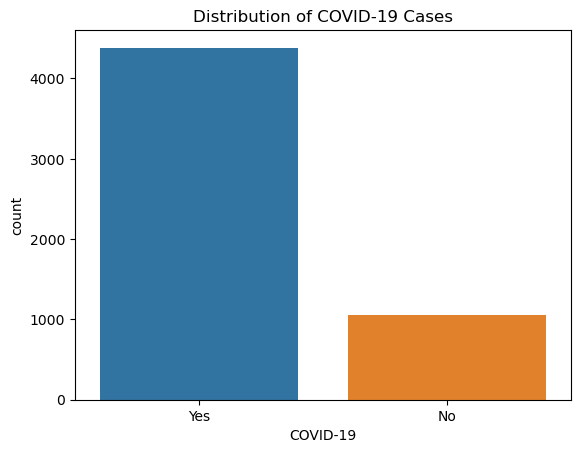

In [8]:
# Target distribution
sns.countplot(x="COVID-19", data=data)
plt.title("Distribution of COVID-19 Cases")
plt.show()

# Step 3: Exploratory Analysis on Key Variables


### 1.Symptoms (e.g., Breathing Problem, Fever)


### 2.Behavioral Factors (e.g., Wearing Masks, Sanitization from Market)

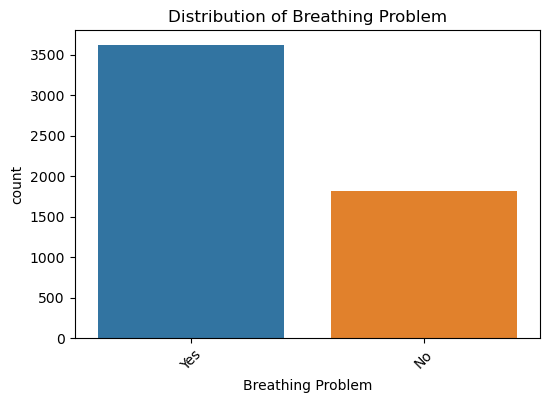

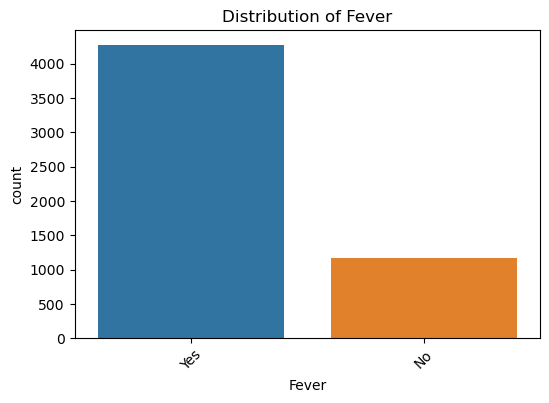

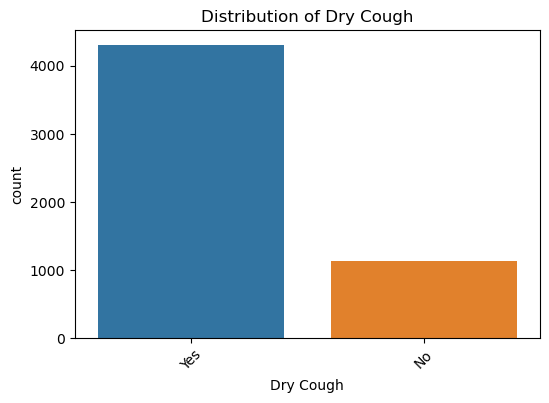

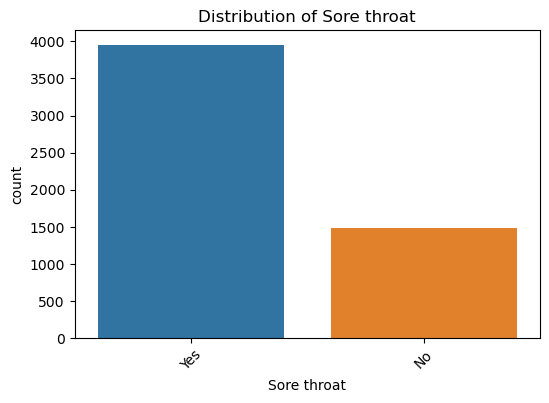

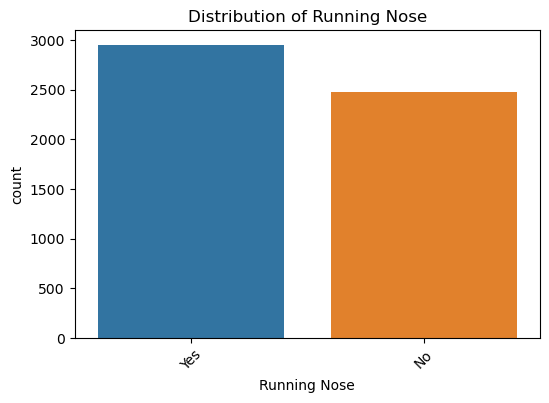

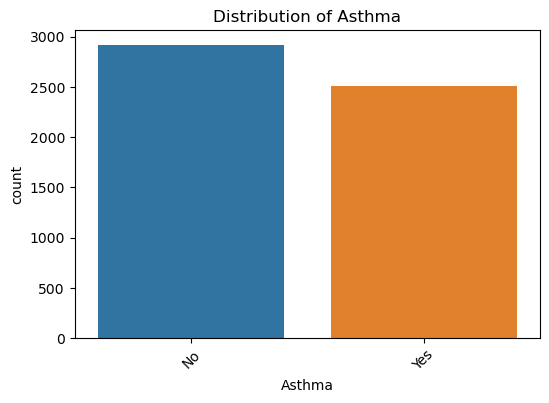

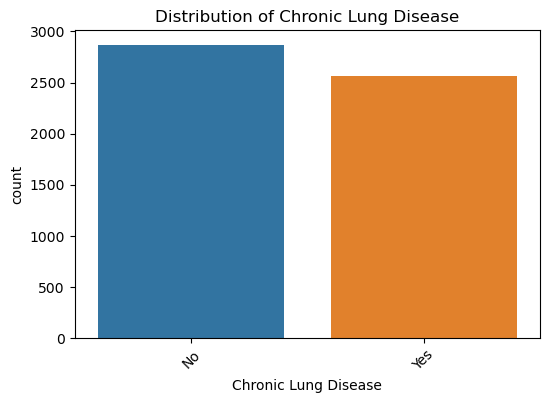

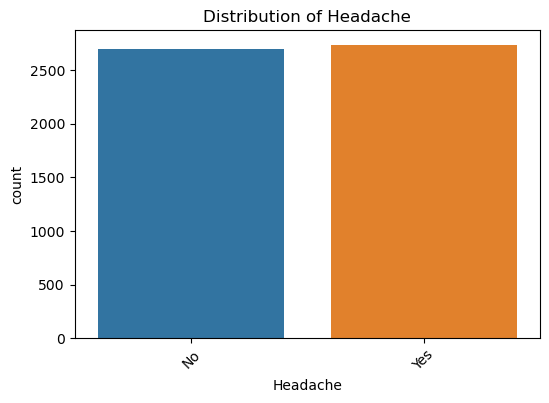

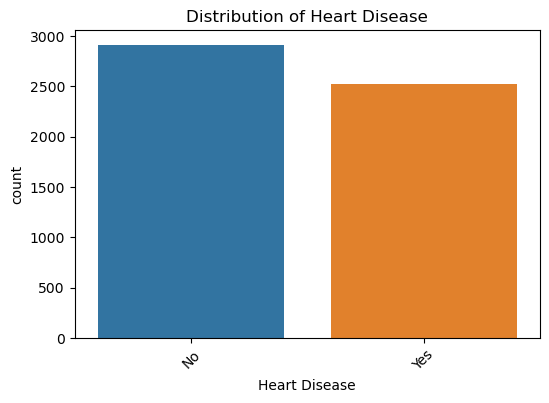

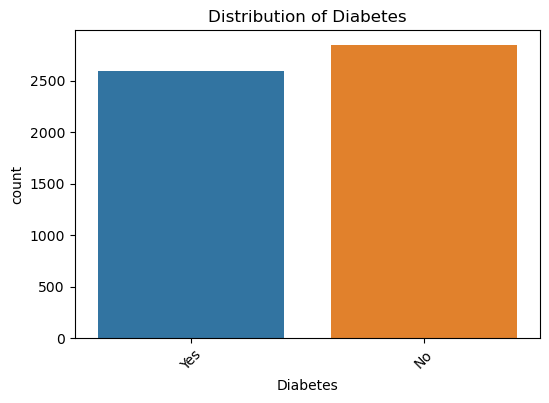

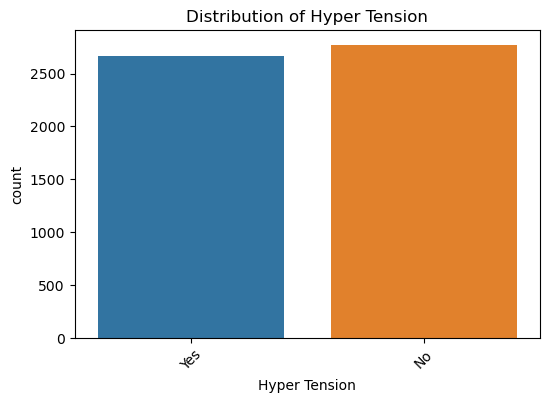

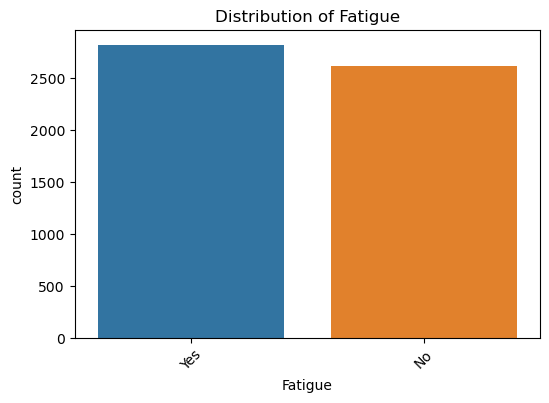

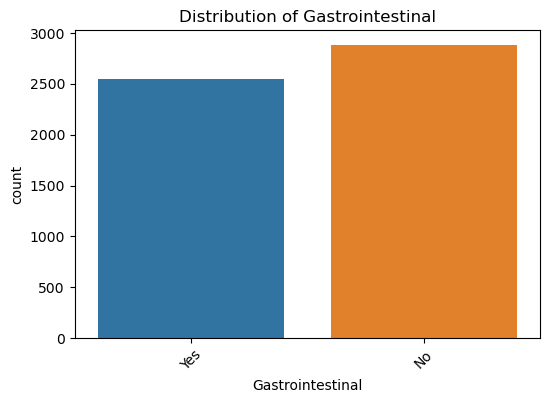

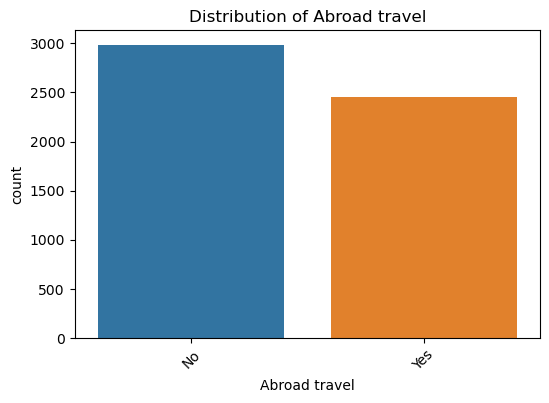

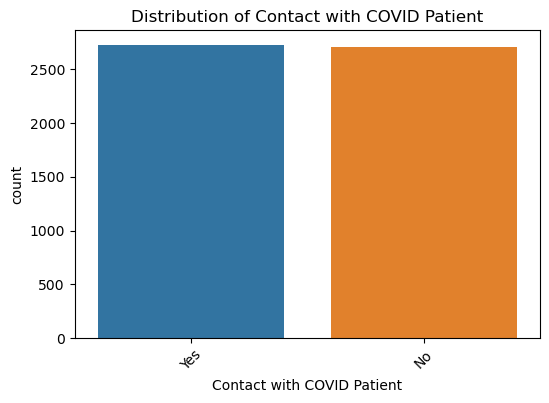

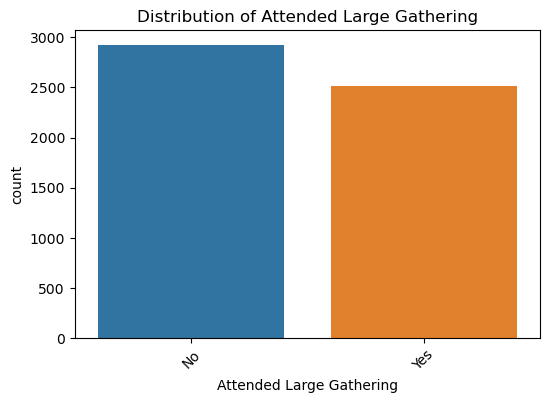

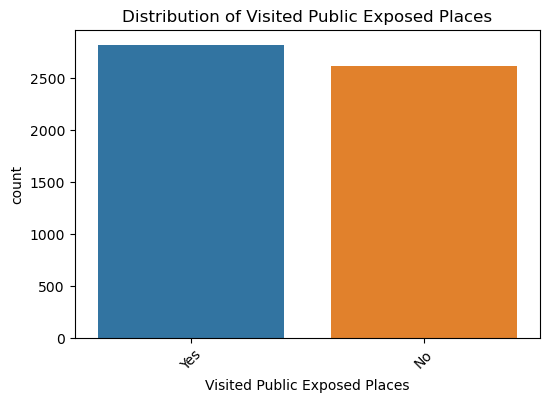

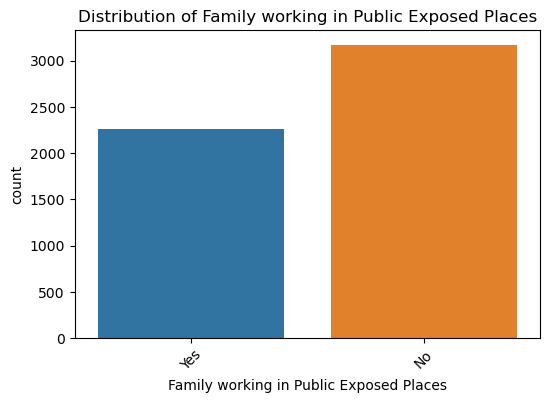

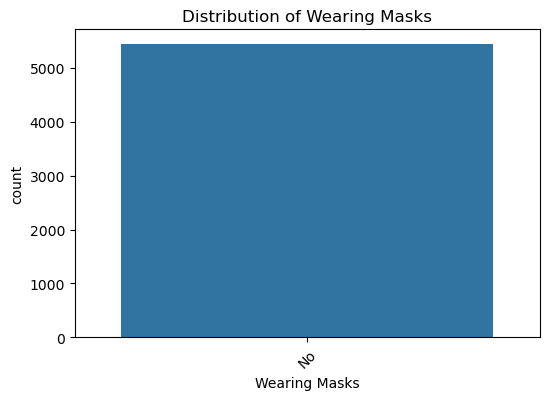

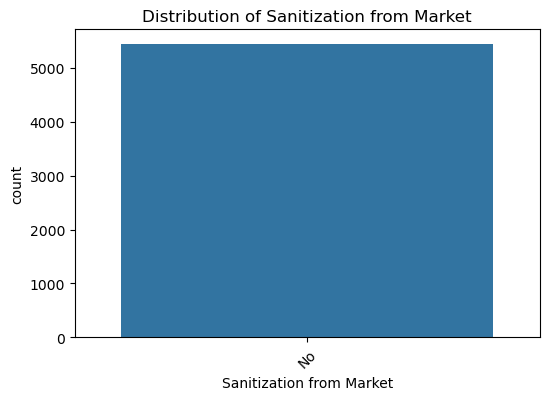

In [25]:
# Plot distribution for each feature
for column in data.columns[:-1]:  # Exclude 'COVID-19' for now
    plt.figure(figsize=(6, 4))
    sns.countplot(x=column, data=data)
    plt.title(f'Distribution of {column}')
    plt.xticks(rotation=45)
    plt.show()

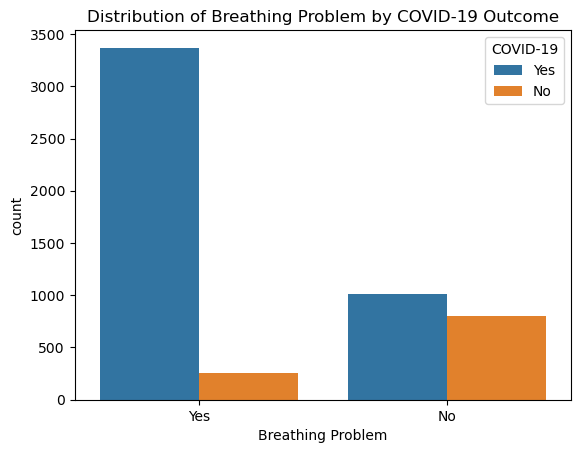

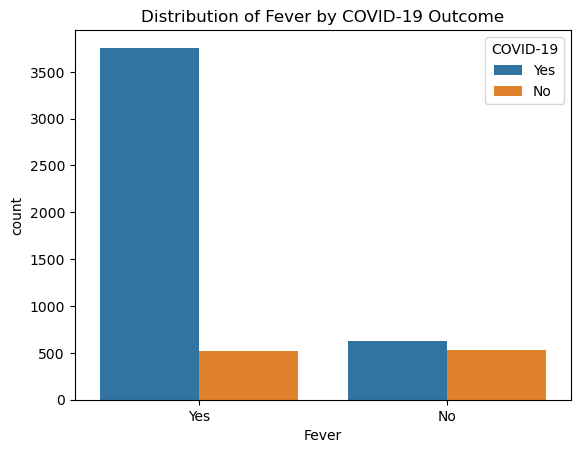

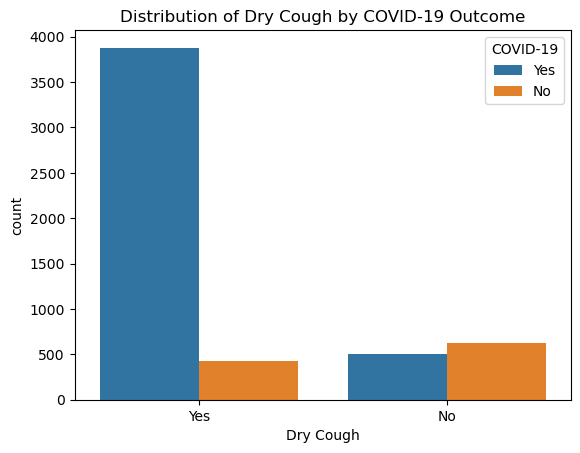

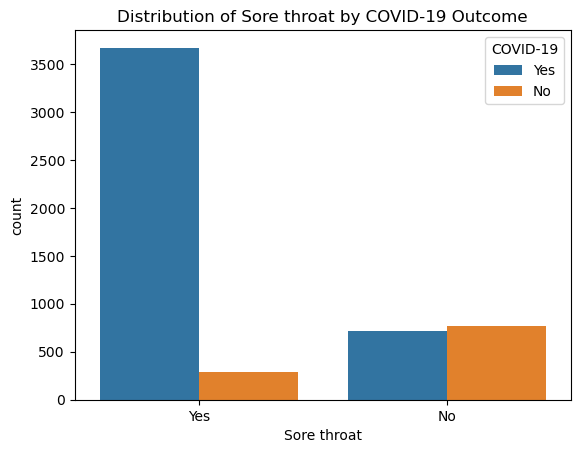

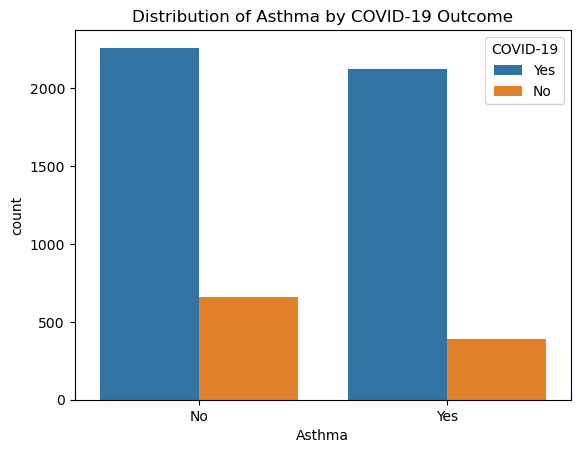

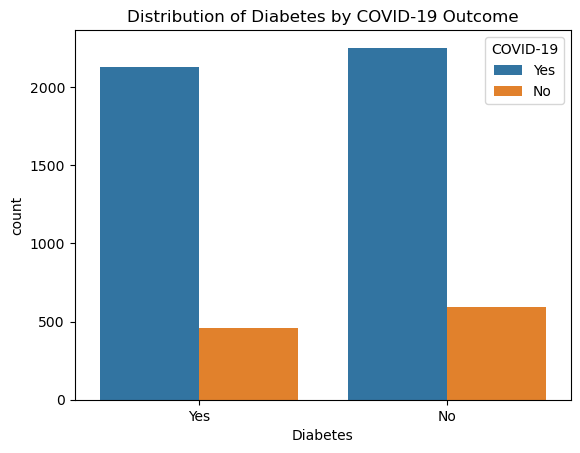

In [9]:
# Plot distributions for some key features
features = ['Breathing Problem', 'Fever', 'Dry Cough', 'Sore throat', 'Asthma', 'Diabetes']
for feature in features:
    sns.countplot(x=feature, data=data, hue='COVID-19')
    plt.title(f"Distribution of {feature} by COVID-19 Outcome")
    plt.show()


# Descriptive Statistics for Categorical Data

In [27]:
df = pd.DataFrame(data)

# Select categorical features and count unique values
categorical_features = df.select_dtypes(include=['object'])  # Select categorical columns
unique_counts = {col: categorical_features[col].value_counts() for col in categorical_features.columns}

# Display unique value counts for each categorical feature
for feature, counts in unique_counts.items():
    print(f"Unique counts for '{feature}':\n{counts}\n")


Unique counts for 'Breathing Problem':
Yes    3620
No     1814
Name: Breathing Problem, dtype: int64

Unique counts for 'Fever':
Yes    4273
No     1161
Name: Fever, dtype: int64

Unique counts for 'Dry Cough':
Yes    4307
No     1127
Name: Dry Cough, dtype: int64

Unique counts for 'Sore throat':
Yes    3953
No     1481
Name: Sore throat, dtype: int64

Unique counts for 'Running Nose':
Yes    2952
No     2482
Name: Running Nose, dtype: int64

Unique counts for 'Asthma':
No     2920
Yes    2514
Name: Asthma, dtype: int64

Unique counts for 'Chronic Lung Disease':
No     2869
Yes    2565
Name: Chronic Lung Disease, dtype: int64

Unique counts for 'Headache':
Yes    2736
No     2698
Name: Headache, dtype: int64

Unique counts for 'Heart Disease':
No     2911
Yes    2523
Name: Heart Disease, dtype: int64

Unique counts for 'Diabetes':
No     2846
Yes    2588
Name: Diabetes, dtype: int64

Unique counts for 'Hyper Tension':
No     2771
Yes    2663
Name: Hyper Tension, dtype: int64

Unique c

# Step 4: Handle Missing Values

In [10]:
# Check for missing values
print(data.isnull().sum())

# Impute missing values with mode since these are likely categorical/binary features
#imputer = SimpleImputer(strategy="most_frequent")
#data_imputed = pd.DataFrame(imputer.fit_transform(data), columns=data.columns)
# Hence there is no missing value we can skip this step.

Breathing Problem                          0
Fever                                      0
Dry Cough                                  0
Sore throat                                0
Running Nose                               0
Asthma                                     0
Chronic Lung Disease                       0
Headache                                   0
Heart Disease                              0
Diabetes                                   0
Hyper Tension                              0
Fatigue                                    0
Gastrointestinal                           0
Abroad travel                              0
Contact with COVID Patient                 0
Attended Large Gathering                   0
Visited Public Exposed Places              0
Family working in Public Exposed Places    0
Wearing Masks                              0
Sanitization from Market                   0
COVID-19                                   0
dtype: int64


# Step 5: Preprocessing
Convert categorical features to binary encoding if necessary (e.g., "Yes"/"No" to 1 and 0) and standardize features if required.

In [11]:
# Convert 'Yes'/'No' responses to 1 and 0
data_imputed = data_imputed.replace({"Yes": 1, "No": 0})

# Define features and target variable
X = data_imputed.drop("COVID-19", axis=1)  # replace with the target column
y = data_imputed["COVID-19"]

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


# Step 6: Standardize the Data 

In [12]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


# Step 7: Fit the Logistic Regression Model

In [13]:
# Initialize and fit the model
model = LogisticRegression()
model.fit(X_train, y_train)


LogisticRegression()

In [30]:
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],  # Regularization strengths
    'penalty': ['l1', 'l2']  # Types of regularization
}


In [36]:
import warnings
from sklearn.exceptions import FitFailedWarning
# Ignore FitFailedWarning
warnings.simplefilter('ignore', FitFailedWarning)
# Create the Grid Search object
grid_search = GridSearchCV(estimator=model, param_grid=param_grid,
                            scoring='accuracy', cv=5, n_jobs=-1)  # 5-fold cross-validation


In [37]:
grid_search.fit(X_train, y_train)  # Replace X_train and y_train with your training data


C:\Users\User\anaconda3\Lib\site-packages\sklearn\model_selection\_search.py:976: UserWarning: One or more of the test scores are non-finite: [       nan 0.89087489        nan 0.96818141        nan 0.96923404
        nan 0.96870807        nan 0.96791929        nan 0.96739366]
  warnings.warn(


GridSearchCV(cv=5, estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100],
                         'penalty': ['l1', 'l2']},
             scoring='accuracy')

In [38]:
# Output the best parameters found
best_params = grid_search.best_params_
print(f"Best Parameters: {best_params}")

Best Parameters: {'C': 0.1, 'penalty': 'l2'}


In [39]:
# Make predictions with the best model
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

# Step 8: Evaluate the Model
Predictions and Confusion Matrix

In [41]:
# Predict on test data
y_pred = model.predict(X_test)
y_proba = model.predict_proba(X_test)[:, 1]

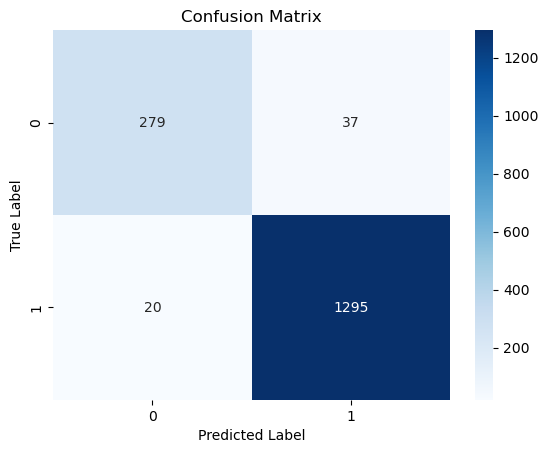

In [42]:
# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()


In [43]:
# Performance Metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_proba)

#Classification report
print(classification_report(y_test, y_pred))
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")
print(f"ROC AUC Score: {roc_auc:.2f}")


              precision    recall  f1-score   support

           0       0.93      0.88      0.91       316
           1       0.97      0.98      0.98      1315

    accuracy                           0.97      1631
   macro avg       0.95      0.93      0.94      1631
weighted avg       0.96      0.97      0.96      1631

Accuracy: 0.97
Precision: 0.97
Recall: 0.98
F1 Score: 0.98
ROC AUC Score: 0.99


## ROC Curve

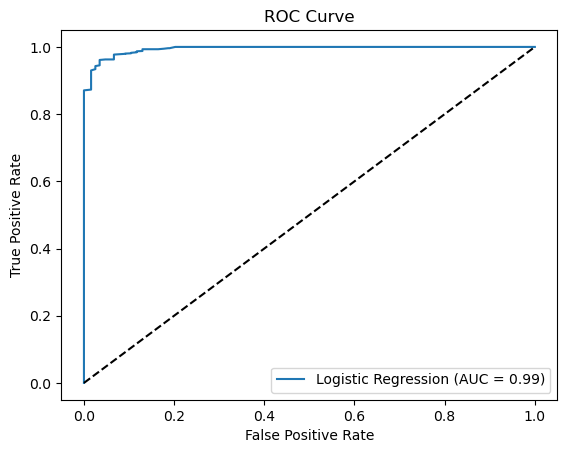

In [23]:
fpr, tpr, thresholds = roc_curve(y_test, y_proba)
plt.plot(fpr, tpr, label="Logistic Regression (AUC = {:.2f})".format(roc_auc))
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend(loc="lower right")
plt.show()


In [46]:
feature_names = [ 'Breathing Problem', 'Fever', 'Dry Cough', 'Sore throat',
                  'Running Nose', 'Asthma', 'Chronic Lung Disease', 'Headache',
                  'Heart Disease', 'Diabetes', 'Hyper Tension', 'Fatigue',
                  'Gastrointestinal', 'Abroad travel', 'Contact with COVID Patient',
                  'Attended Large Gathering', 'Visited Public Exposed Places',
                  'Family working in Public Exposed Places', 'Wearing Masks',
                  'Sanitization from Market']

# Use this list for creating the DataFrame
model_summary = pd.DataFrame({
    'Feature': feature_names,
    'Coefficient': coefficients,
    'Odds Ratio': odds_ratios
})


# Display the summary
print(model_summary)


                                    Feature  Coefficient  Odds Ratio
0                         Breathing Problem     1.012359    2.752087
1                                     Fever     0.954194    2.596576
2                                 Dry Cough     0.988713    2.687772
3                               Sore throat     0.999495    2.716909
4                              Running Nose    -0.365682    0.693724
5                                    Asthma    -0.007695    0.992335
6                      Chronic Lung Disease    -0.081657    0.921588
7                                  Headache    -0.020842    0.979374
8                             Heart Disease    -0.004560    0.995450
9                                  Diabetes     0.153840    1.166304
10                            Hyper Tension    -0.003683    0.996324
11                                  Fatigue    -0.042613    0.958282
12                         Gastrointestinal    -0.027596    0.972781
13                            Abro